# Week 4 Hand-in

## Exercise 1

In [1]:
# Class exercise: table

import numpy as np

a = np.arange(10, 30).reshape(4, 5)
print('Table', a)

red = a[0, 1:4]
print('Red:', red)

green = a[0:3, 2]
print('Green:', green)

light_blue = a[0:5, 1]
print('Light_blue:', light_blue)

deep_blue = a[0:3:2, 4]
print('Deep_blue:', deep_blue)




Table [[10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]]
Red: [11 12 13]
Green: [12 17 22]
Light_blue: [11 16 21 26]
Deep_blue: [14 24]


In [2]:
# Class exercise Cube

import numpy as np
a = np.arange(0, 27).reshape((3, 3, 3))
print('Cube: ', a, '\n---')
print('1:', a[1, 1, :], '\n---') 
print('2:', a[:, 1, 0], '\n---')
print('3:', a[0, :, 2], '\n---')

Cube:  [[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]] 
---
1: [12 13 14] 
---
2: [ 3 12 21] 
---
3: [2 5 8] 
---


In [3]:
# Class exercise masking

data = np.arange(1,101).reshape(10, 10)
print(data, '\n----')
even = data[data%2 == 0]
print('Even numbers', even, '\n----')
ends_6 = np.where(data%10 == 6)

print('ends_6', ends_6, '\n----')
print('ends-6',data[ends_6])


[[  1   2   3   4   5   6   7   8   9  10]
 [ 11  12  13  14  15  16  17  18  19  20]
 [ 21  22  23  24  25  26  27  28  29  30]
 [ 31  32  33  34  35  36  37  38  39  40]
 [ 41  42  43  44  45  46  47  48  49  50]
 [ 51  52  53  54  55  56  57  58  59  60]
 [ 61  62  63  64  65  66  67  68  69  70]
 [ 71  72  73  74  75  76  77  78  79  80]
 [ 81  82  83  84  85  86  87  88  89  90]
 [ 91  92  93  94  95  96  97  98  99 100]] 
----
Even numbers [  2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36
  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70  72
  74  76  78  80  82  84  86  88  90  92  94  96  98 100] 
----
ends_6 (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5])) 
----
ends-6 [ 6 16 26 36 46 56 66 76 86 96]


In [4]:
%%bash
head /home/jovyan/data/befkbhalderstatkode.csv

AAR,BYDEL,ALDER,STATKODE,PERSONER
2015,1,0,5100,614
2015,1,0,5104,2
2015,1,0,5106,1
2015,1,0,5110,1
2015,1,0,5120,4
2015,1,0,5126,1
2015,1,0,5130,5
2015,1,0,5140,3
2015,1,0,5150,5


In [5]:
import numpy as np
filename = '/home/jovyan/data/befkbhalderstatkode.csv'
dd = np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)
print(type(dd), 'size: ', dd.size)
print('First line: ', dd[0])



<class 'numpy.ndarray'> size:  2712585
First line:  [2015    1    0 5100  614]


In [6]:
# 3 Find out how many people lived in each of the 11 areas in 2015

mask_2015 = (dd[:, 0] == 2015)
area_set = set(dd[:, 1])

def sum_of_people_per_neighbourhood(n, mask_2015):
    all_people_in_given_n = dd[mask_2015 & (dd[:,1] == n)]
    sum_of_people = all_people_in_given_n[:,4].sum() # index 4 is no of 'PERSONER'
    return sum_of_people

All_per_NH_2015 = np.array([sum_of_people_per_neighbourhood(n, mask_2015) for n in area_set])
print('Sum of all ppl per NH in 2015:', '\n', All_per_NH_2015)




Sum of all ppl per NH in 2015: 
 [51937 75113 78802 61623 51727 39537 43908 53604 55205 64967  3872]


(1.0, 99.0, 300.0, 100000.0)

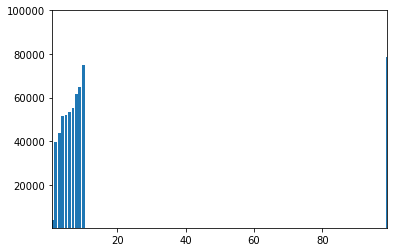

In [7]:
# 4 Make a bar plot to show the size of each city area from the smallest to the largest in 2015
import matplotlib.pyplot as plt

All_per_NH_2015.sort()

plt.bar(list(area_set), list(All_per_NH_2015))
plt.axis([min(area_set), max(area_set),300,100000])

In [8]:
# 5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015
mask_2015 = (dd[:, 0] == 2015)
#dd[mask_2015]
mask_age_above65 =  (dd[:, 2] > 65)
# dd[mask_age_above65]

mask_all_above65_cph_2015 = (mask_2015) & (mask_age_above65)
# dd[mask_all_above65_cph_2015]
print('Total 65+ in 2015:', np.sum(dd[mask_all_above65_cph_2015][:, 4]), 'people')

Total 65+ in 2015: 55750 people


In [9]:
country_codes = {0: 'Uoplyst (1)', 5001: 'Uoplyst (2)', 5100: 'Danmark', 5101: 'Grønland', 
                 5102: 'Udlandet uoplyst', 5103: 'Statsløs', 5104: 'Finland', 
                 5105: 'Island, ligeret dansk', 5106: 'Island', 5107: 'Liechtenstein', 
                 5108: 'Luxembourg', 5109: 'Monaco', 5110: 'Norge', 5114: 'Europa uoplyst', 
                 5115: 'Kongelig', 5120: 'Sverige', 5122: 'Albanien', 5124: 'Andorra', 
                 5126: 'Belgien', 5128: 'Bulgarien', 5129: 'Tjekkoslovakiet', 
                 5130: 'Frankrig', 5134: 'Grækenland', 5140: 'Nederlandene', 
                 5142: 'Irland', 5150: 'Italien', 5151: 'Serbien og Montenegro', 
                 5152: 'Jugoslavien', 5153: 'Malta', 5154: 'Polen', 5156: 'Portugal', 
                 5158: 'Rumænien', 5159: 'San Marino', 5160: 'Schweiz', 
                 5162: 'Sovjetunionen', 5164: 'Spanien', 5170: 'Storbritannien', 
                 5172: 'Tyrkiet', 5174: 'Ungarn', 5176: 'Vatikanstaten', 5180: 'Tyskland', 
                 5182: 'Østrig', 5199: 'Europa uoplyst', 5202: 'Algeriet', 5204: 'Angola', 
                 5207: 'Botswana', 5213: 'Burundi', 5214: 'Etiopien', 5215: 'Comorerne', 
                 5216: 'Eritrea', 5222: 'Gambia', 5228: 'Ghana', 5230: 'Ækvatorialguinea', 
                 5231: 'Guinea-Bissau', 5232: 'Guinea', 5233: 'Kap Verde', 5234: 'Kenya', 
                 5235: 'Lesotho', 5236: 'Liberia', 5238: 'Libyen', 5240: 'Mozambique', 
                 5242: 'Madagaskar', 5243: 'Mali', 5244: 'Marokko', 5245: 'Mauritius', 
                 5246: 'Nigeria', 5247: 'Namibia', 5248: 'Marshalløerne', 
                 5255: 'Sierra Leone', 5258: 'Sudan', 5259: 'Swaziland', 5260: 'Sydsudan', 
                 5262: 'Sydafrika', 5266: 'Tanzania', 5268: 'Tunesien', 5269: 'Uganda', 
                 5272: 'Egypten', 5273: 'Tuvalu', 5274: 'Kiribati', 5275: 'Vanuatu', 
                 5276: 'Centralafrikanske Republik', 5277: 'Cameroun', 
                 5278: 'Congo, Demokratiske Republik', 5279: 'Congo, Republikken', 
                 5281: 'Benin', 5282: 'Elfenbenskysten', 5283: 'Gabon', 5284: 'Mauretanien', 
                 5285: 'Niger', 5287: 'Rwanda', 5288: 'Senegal', 5289: 'Somalia', 
                 5292: 'Tchad', 5293: 'Togo', 5294: 'Burkina Faso', 5295: 'Zimbabwe', 
                 5296: 'Zambia', 5297: 'Malawi', 5298: 'Seychellerne', 
                 5299: 'Afrika uoplyst', 5302: 'Argentina', 5303: 'Bahamas', 
                 5304: 'Bolivia', 5305: 'Barbados', 5306: 'Brasilien', 5308: 'Guyana', 
                 5309: 'Antigua og Barbuda', 5310: 'Nauru', 
                 5311: 'Skt. Vincent og Grenadinerne', 5314: 'Canada', 5316: 'Chile', 
                 5318: 'Colombia', 5319: 'Syd- og Mellemamerika uoplyst', 
                 5322: 'Costa Rica', 5324: 'Cuba', 5326: 'Dominikanske Republik', 
                 5328: 'Ecuador', 5338: 'Guatemala', 5339: 'Grenada', 5342: 'Haiti', 
                 5344: 'Surinam', 5345: 'Dominica', 5347: 'Skt. Lucia', 5348: 'Honduras', 
                 5352: 'Jamaica', 5354: 'Mexico', 5356: 'Nicaragua', 5358: 'Panama', 
                 5364: 'Paraguay', 5366: 'Peru', 5372: 'El Salvador', 
                 5374: 'Trinidad og Tobago', 5376: 'Uruguay', 5390: 'USA', 
                 5392: 'Venezuela', 5395: 'Vestindiske Øer', 5397: 'Nordamerika uoplyst', 
                 5398: 'Syd- og Mellemamerika uoplyst', 5402: 'Yemen', 
                 5403: 'Forenede Arabiske Emirater', 5404: 'Afghanistan', 5406: 'Bahrain', 
                 5408: 'Bhutan', 5410: 'Bangladesh', 5412: 'Brunei', 5414: 'Myanmar', 
                 5416: 'Cambodja', 5418: 'Sri Lanka', 5422: 'Cypern', 5424: 'Taiwan', 
                 5432: 'Indien', 5434: 'Indonesien', 5435: 'Østtimor', 5436: 'Irak', 
                 5438: 'Iran', 5442: 'Israel', 5444: 'Japan', 5446: 'Jordan', 5448: 'Kina', 
                 5452: 'Kuwait', 5454: 'Laos', 5456: 'Libanon', 5457: 'Maldiverne', 
                 5458: 'Malaysia', 5459: 'Mongoliet', 5462: 'Oman', 5464: 'Nepal', 
                 5466: 'Nordkorea', 5468: 'Vietnam (1)', 5471: 'Asien uoplyst', 
                 5472: 'Pakistan', 5474: 'Filippinerne', 5478: 'Saudi-Arabien', 
                 5482: 'Singapore', 5484: 'Sydkorea', 5486: 'Syrien', 
                 5487: 'Mellemøsten uoplyst', 5488: 'Vietnam (2)', 5492: 'Thailand', 
                 5496: 'Qatar', 5499: 'Asien uoplyst', 5502: 'Australien', 5505: 'Tonga', 
                 5508: 'Fiji', 5514: 'New Zealand', 5522: 'Samoa', 5525: 'Djibouti', 
                 5526: 'Belize', 5534: 'Papua Ny Guinea', 5599: 'Øer i Stillehavet', 
                 5607: 'Estland', 5609: 'Letland', 5611: 'Litauen', 
                 5621: 'Sao Tome og Principe', 5623: 'Salomonøerne', 
                 5625: 'Skt. Kitts og Nevis', 5700: 'Rusland', 5704: 'Ukraine', 
                 5706: 'Hviderusland', 5708: 'Armenien', 5710: 'Aserbajdsjan', 
                 5712: 'Moldova', 5714: 'Usbekistan', 5716: 'Kasakhstan', 
                 5718: 'Turkmenistan', 5720: 'Kirgisistan', 5722: 'Tadsjikistan', 
                 5724: 'Georgien', 5750: 'Kroatien', 5752: 'Slovenien', 
                 5754: 'Bosnien-Hercegovina', 5756: 'Makedonien', 5757: 'Serbien', 
                 5758: 'Jugoslavien, Forbundsrepublikken', 5759: 'Montenegro', 
                 5761: 'Kosovo', 5776: 'Tjekkiet', 5778: 'Slovakiet', 5779: 'Cookøerne', 
                 5800: 'Land ukendt (2)', 5901: 'Færøerne uoplyst', 5902: 'Færøerne', 
                 5999: 'Land ukendt (1)'}

In [10]:
# 6. How many of those were from the other nordic countries (not dk). Hint: see notebook: "04 Numpy"
nordic_countries = ["Norge","Sverige","Finland","Island","Grønland"] 
ma = mask_all_above65_cph_2015
old_nords = 0
for key, value in country_codes.items():
    if value in nordic_countries:
        print(value)
        mask = (ma) & (dd[:, 3] == key)
        country_sum = (dd[mask][0:,4].sum())
        print(country_sum) 
        old_nords += country_sum
print("Nordiske beboere over 65 år: ", old_nords)
    

Grønland
0
Finland
72
Island
33
Norge
236
Sverige
267
Nordiske beboere over 65 år:  608.0


{1992: 47854,
 1993: 47589,
 1994: 47538,
 1995: 47633,
 1996: 47734,
 1998: 49109,
 1999: 49520,
 2000: 50312,
 2001: 50756,
 2002: 51039,
 2003: 51045,
 2004: 50869}

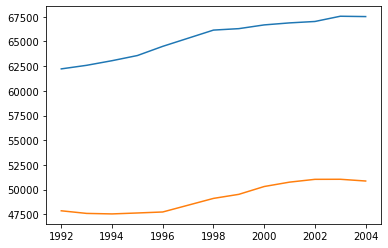

In [68]:
# 7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015

import matplotlib.pyplot as plt

mask_years = dd[(dd[:, 0] >= 1992) & (dd[:, 0] < 2015)]
mask_vesterbro = (dd[:,1] == 2)
mask_østerbro = (dd[:,1] == 4)

manual_years = [1992, 1993, 1994, 1995, 1996, 1998, 1999, 2000, 2001, 2002, 2003, 2004]
def number_of_people_per_mask_years(mask):
    sd = dict()
    for n in manual_years:
        all_people_in_given_n = dd[mask & (dd[:, 0] == n)]
        sum_of_people = all_people_in_given_n[:,4].sum() # index 4 is no of 'PERSONER'
        sd.setdefault(n, sum_of_people)
    plt.plot(list(sd.keys()), list(sd.values()))
    return sd

number_of_people_per_mask_years(mask_vesterbro)
number_of_people_per_mask_years(mask_østerbro)


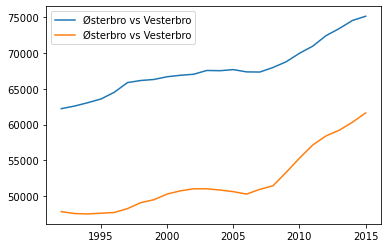

In [85]:
import matplotlib.pyplot as plt

mask_vesterbro = (dd[:,1] == 2)
mask_østerbro = (dd[:,1] == 4)

def number_of_people_per_mask_years(mask, start, end):
    sd = dict()
    mask_years = (dd[:, 0] >= start) & (dd[:, 0] < end)
    years = dd[(mask & (mask_years))]
    for n in range(start, end):
        year = years[(years[:, 0] == n)]
        #year = dd[(years & (dd[:, 0] == n))]
        #print(year)
        sum = year[:, 4].sum()
        #print(sum)
        sd.setdefault(n, sum)
    plt.plot(list(sd.keys()), list(sd.values()), label= 'Østerbro vs Vesterbro')
    plt.legend()
number_of_people_per_mask_years(mask_vesterbro, 1992, 2016)
number_of_people_per_mask_years(mask_østerbro, 1992, 2016)



